### Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

#### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. 

These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# I check the info about the dataset to see dtype, number of columns and rows, and most important if we have any null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# double check for nulls with isnull.sum method. 
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [6]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

We can see that for 'Workcalss','Ocupation' and 'Native_country' we have categories marked with a question mark. I will treat them as null values and drop them as the dataset is big enough. 

In [7]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [8]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [9]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [10]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [11]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [13]:
df.loc[df.Native_country==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [14]:
df.loc[df.Occupation==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [15]:
df.loc[df.Workclass==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


At a first look we can see that 'Occupation' and 'Workclass' missing values are in the same raws. I will drop them and go further with my analysis. 

In [16]:
df.drop(df[df['Native_country'] == ' ?'].index,inplace=True)
df.drop(df[df['Occupation'] == ' ?'].index,inplace=True)
df.drop(df[df['Workclass'] == ' ?'].index,inplace=True)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
df['Native_country'].value_counts()

 United-States                 27503
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [18]:
df['Workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1278
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Workclass, dtype: int64

In [19]:
df['Occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3720
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: Occupation, dtype: int64

We can see that the question mark is gone from our dataset. 

<Axes: >

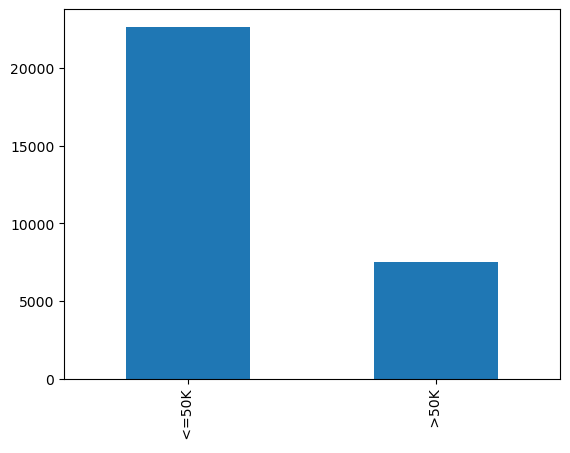

In [20]:
df['Income'].value_counts().plot(kind='bar')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Transport-moving'),
  Text(7, 0, ' Farming-fishing'),
  Text(8, 0, ' Machine-op-inspct'),
  Text(9, 0, ' Tech-support'),
  Text(10, 0, ' Craft-repair'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

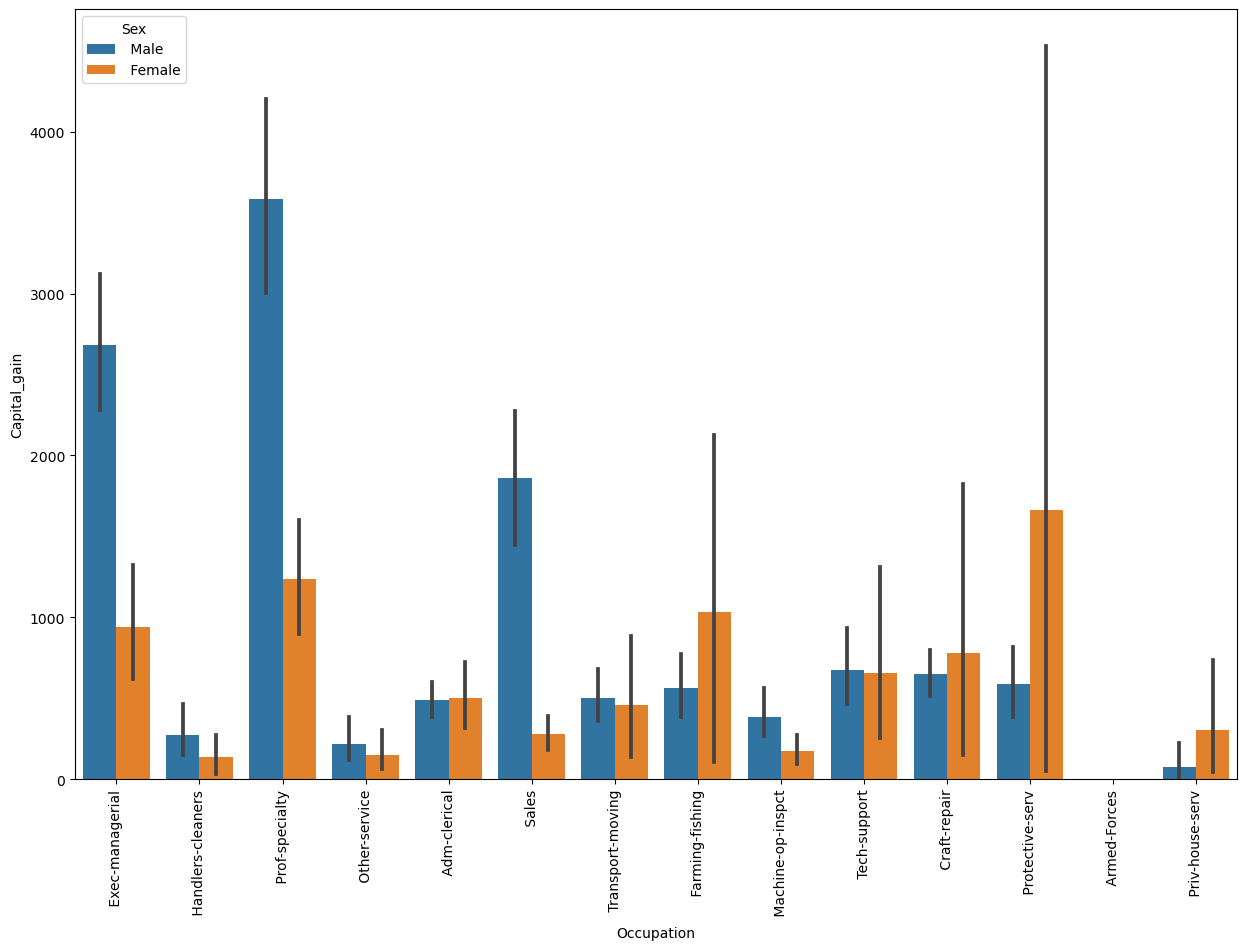

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_gain',data=df,hue='Sex')
plt.xticks(rotation=90)

<Axes: xlabel='Education', ylabel='Hours_per_week'>

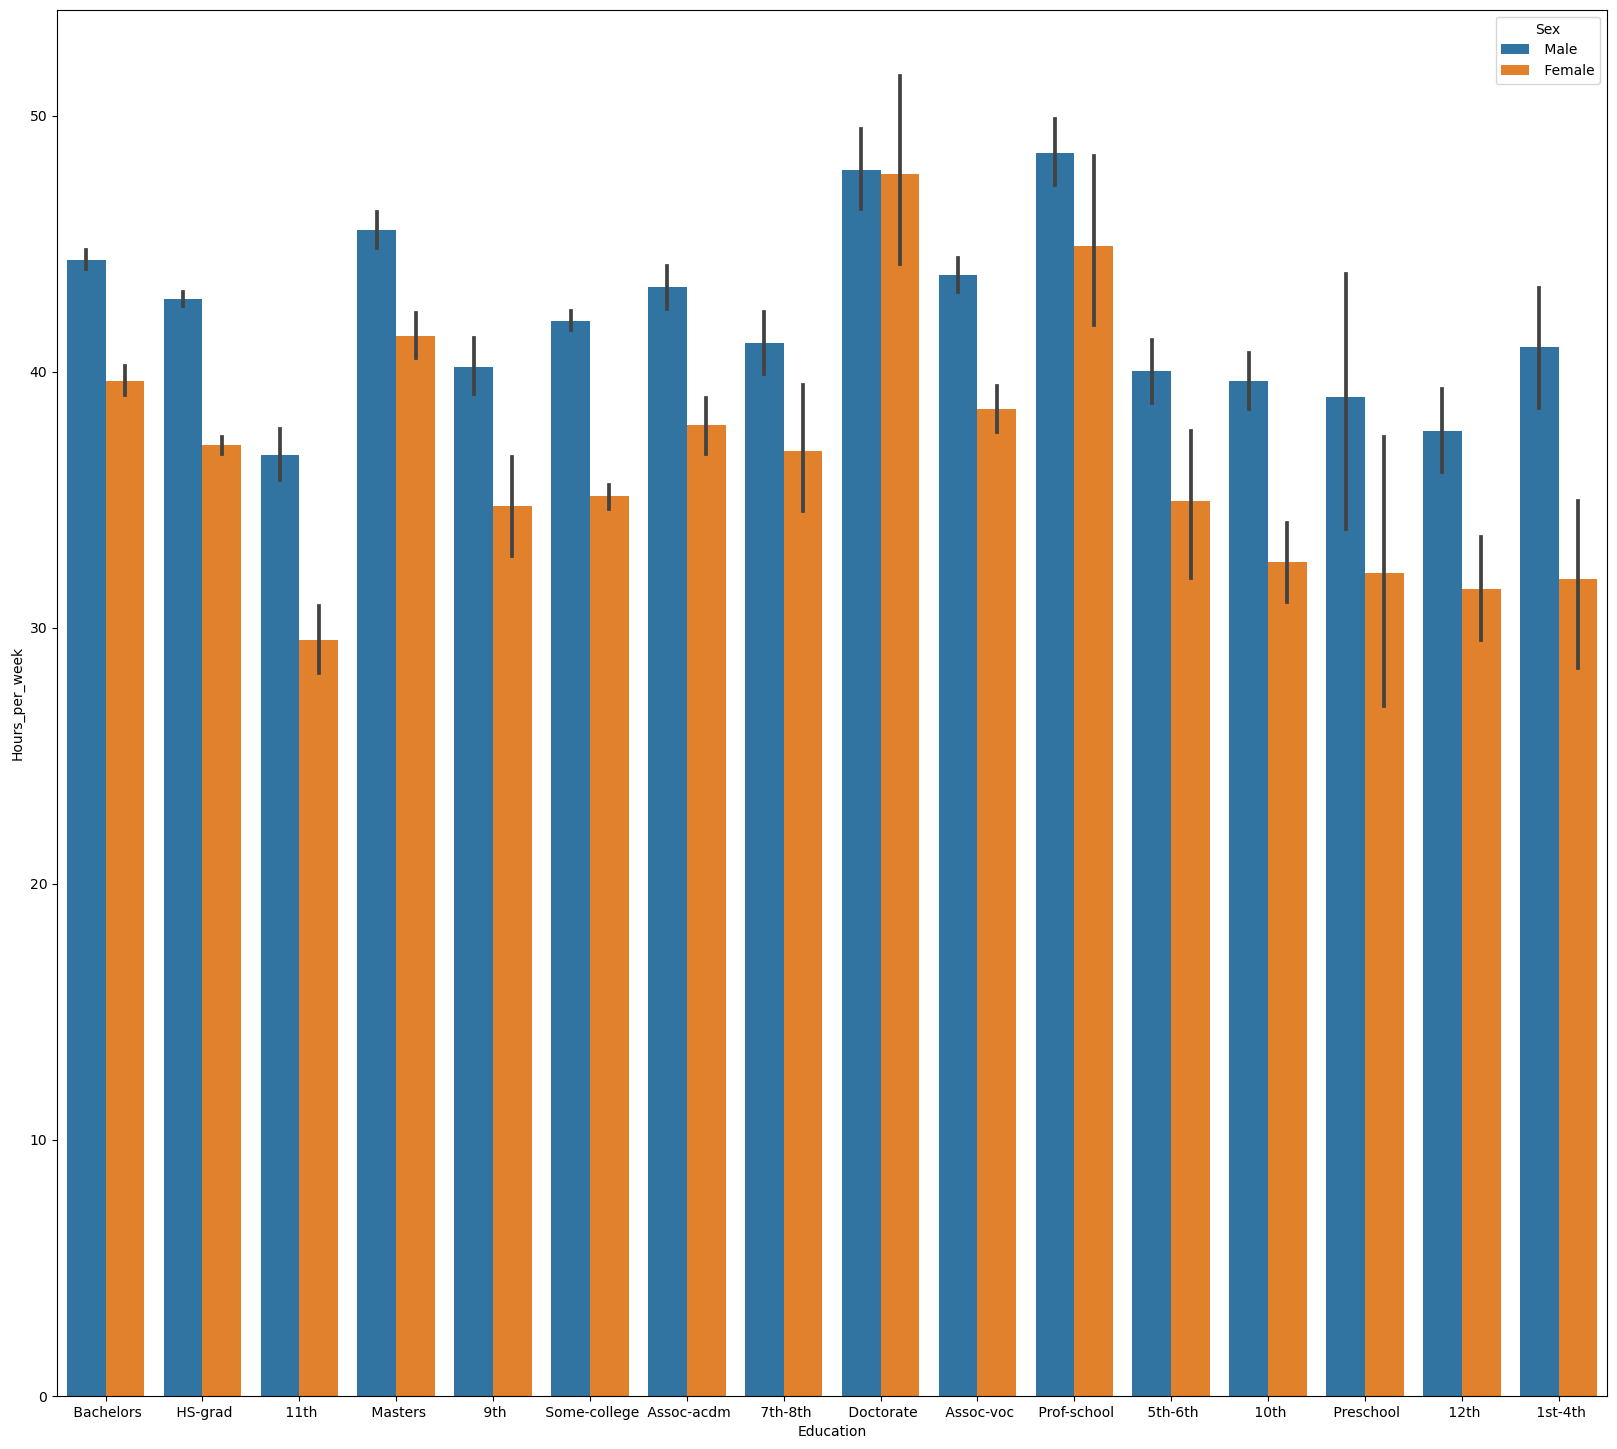

In [22]:
plt.figure(figsize=(20,18))
sns.barplot(x='Education',y='Hours_per_week',data=df,hue='Sex')

In [23]:
df.skew()

Age                0.530223
Fnlwgt             1.459212
Education_num     -0.305328
Capital_gain      11.902511
Capital_loss       4.526294
Hours_per_week     0.330856
dtype: float64

In [24]:
skew = ('Fnlwgt','Capital_gain','Capital_loss')
for i in skew:
    if df.skew().loc[i]>0.55:
        df[i] = np.cbrt(df[i])

In [25]:
df.skew()

Age               0.530223
Fnlwgt           -0.161106
Education_num    -0.305328
Capital_gain      4.054561
Capital_loss      4.299976
Hours_per_week    0.330856
dtype: float64

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # label encoder 
df['Income']=le.fit_transform(df['Income']) 
df['Sex']=le.fit_transform(df['Sex'])
#Converting 2 columns into binary 
df = pd.get_dummies(df,drop_first=True)

In [27]:
x = df.drop(['Income'],axis=1)
y = df['Income']

In [28]:
print(x.shape)
print(y.shape)

(30161, 96)
(30161,)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x # we use this so the model dont prioritize any feature and everyone have the same impact in the model. 

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0.880275,-1.086972,1.128961,0.692823,-0.280673,-0.22222,-2.331495,-0.271246,-1.682251,-0.192155,...,-0.033594,-0.060225,-0.019101,-0.048576,-0.037343,-0.023748,-0.024437,0.310876,-0.046114,-0.023038
1,-0.033338,0.417103,-0.439703,0.692823,-0.280673,-0.22222,-0.077735,-0.271246,0.594442,-0.192155,...,-0.033594,-0.060225,-0.019101,-0.048576,-0.037343,-0.023748,-0.024437,0.310876,-0.046114,-0.023038
2,1.108678,0.575747,-1.224035,0.692823,-0.280673,-0.22222,-0.077735,-0.271246,0.594442,-0.192155,...,-0.033594,-0.060225,-0.019101,-0.048576,-0.037343,-0.023748,-0.024437,0.310876,-0.046114,-0.023038
3,-0.794682,1.314362,1.128961,-1.443370,-0.280673,-0.22222,-0.077735,-0.271246,0.594442,-0.192155,...,-0.033594,-0.060225,-0.019101,-0.048576,-0.037343,-0.023748,-0.024437,-3.216715,-0.046114,-0.023038
4,-0.109472,0.953391,1.521127,-1.443370,-0.280673,-0.22222,-0.077735,-0.271246,0.594442,-0.192155,...,-0.033594,-0.060225,-0.019101,-0.048576,-0.037343,-0.023748,-0.024437,0.310876,-0.046114,-0.023038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.870817,0.752804,0.736795,-1.443370,-0.280673,-0.22222,-0.244681,-0.271246,0.594442,-0.192155,...,-0.033594,-0.060225,-0.019101,-0.048576,-0.037343,-0.023748,-0.024437,0.310876,-0.046114,-0.023038
30157,0.118931,-0.166611,-0.439703,0.692823,-0.280673,-0.22222,-0.077735,-0.271246,0.594442,-0.192155,...,-0.033594,-0.060225,-0.019101,-0.048576,-0.037343,-0.023748,-0.024437,0.310876,-0.046114,-0.023038
30158,1.489350,-0.193101,-0.439703,-1.443370,-0.280673,-0.22222,-0.077735,-0.271246,0.594442,-0.192155,...,-0.033594,-0.060225,-0.019101,-0.048576,-0.037343,-0.023748,-0.024437,0.310876,-0.046114,-0.023038
30159,-1.251489,0.293212,-0.439703,0.692823,-0.280673,-0.22222,-1.747187,-0.271246,0.594442,-0.192155,...,-0.033594,-0.060225,-0.019101,-0.048576,-0.037343,-0.023748,-0.024437,0.310876,-0.046114,-0.023038


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0 
maxRS = 0
for i in range(1,200): # we can take any rainge
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Best accuracy is', maxAccu, 'at random_State', maxRS)

Best accuracy is 0.8564482263233506 at random_State 17


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRS)

In [32]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [33]:
# Checking accuracy for RandomForestClasifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8552326223892143
[[6380  463]
 [ 847 1359]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6843
           1       0.75      0.62      0.67      2206

    accuracy                           0.86      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.85      0.86      0.85      9049



In [34]:
# Checking the accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.8478284893358382
[[6352  491]
 [ 886 1320]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6843
           1       0.73      0.60      0.66      2206

    accuracy                           0.85      9049
   macro avg       0.80      0.76      0.78      9049
weighted avg       0.84      0.85      0.84      9049



In [35]:
# Checking accuracy for Support Vector Machine Classifier 

svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8446237153276606
[[6439  404]
 [1002 1204]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6843
           1       0.75      0.55      0.63      2206

    accuracy                           0.84      9049
   macro avg       0.81      0.74      0.77      9049
weighted avg       0.84      0.84      0.84      9049



In [36]:
# Checking accuracy for Bagging Classifier 
BC= BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test, predBC))

0.8460603381589126
[[6370  473]
 [ 920 1286]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6843
           1       0.73      0.58      0.65      2206

    accuracy                           0.85      9049
   macro avg       0.80      0.76      0.78      9049
weighted avg       0.84      0.85      0.84      9049



In [37]:
#Checking accuracy for ExtraTreesClassifier 
ET= ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8369985633771687
[[6237  606]
 [ 869 1337]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      6843
           1       0.69      0.61      0.64      2206

    accuracy                           0.84      9049
   macro avg       0.78      0.76      0.77      9049
weighted avg       0.83      0.84      0.83      9049



In [38]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.866615095590673
[[6513  330]
 [ 877 1329]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6843
           1       0.80      0.60      0.69      2206

    accuracy                           0.87      9049
   macro avg       0.84      0.78      0.80      9049
weighted avg       0.86      0.87      0.86      9049



In [39]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8630787932368218
[[6426  417]
 [ 822 1384]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6843
           1       0.77      0.63      0.69      2206

    accuracy                           0.86      9049
   macro avg       0.83      0.78      0.80      9049
weighted avg       0.86      0.86      0.86      9049



### Cross Validation Score 

In [40]:
# Checking cv score for RFC
score = cross_val_score(RFC, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predRFC) - score.mean())

[0.84767114 0.84897215 0.84665119 0.8561008  0.85427719]
0.8507344936623987
Difference between Accuracy score and cross validation score is - 0.004498128726815542


In [41]:
# Checking cv score for LR
score = cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predLR) - score.mean())

[0.84253274 0.83769894 0.8456565  0.84698276 0.84350133]
0.8432744518323403
Difference between Accuracy score and cross validation score is - 0.004554037503497921


In [42]:
# Checking cv score for SVC
score = cross_val_score(svc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predsvc) - score.mean())

[0.8397149  0.83637268 0.84482759 0.84830902 0.8428382 ]
0.8424124762963736
Difference between Accuracy score and cross validation score is - 0.002211239031286949


In [43]:
# Checking cv score for BC
score = cross_val_score(BC, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predBC) - score.mean())

[0.84087519 0.83985411 0.8484748  0.84549072 0.84681698]
0.8443023582497853
Difference between Accuracy score and cross validation score is - 0.001757979909127294


In [44]:
# Checking cv score for ET
score = cross_val_score(ET, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predET) - score.mean())

[0.83225593 0.82692308 0.82907825 0.83687003 0.83255968]
0.8315373920449025
Difference between Accuracy score and cross validation score is - 0.0054611713322662014


In [45]:
# Checking cv score for GB
score = cross_val_score(GB, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predGB) - score.mean())

[0.85844522 0.85527188 0.86438992 0.86671088 0.8655504 ]
0.862073658978184
Difference between Accuracy score and cross validation score is - 0.004541436612488958


In [46]:
# Checking cv score for ABC
score = cross_val_score(ABC, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predABC) - score.mean())

[0.85148351 0.84764589 0.8579244  0.86356101 0.86057692]
0.8562383460375539
Difference between Accuracy score and cross validation score is - 0.006840447199267907


### Hyper Parameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['friedman_mse', 'squared_error'],
              'loss': ['log_loss','exponential'],
              'random_state':[1,17,25],
              'n_estimators':[1,10,11]}
GCV= GridSearchCV(GradientBoostingClassifier(), parameters, cv = 5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [1, 10, 11],
                         'random_state': [1, 17, 25]})

In [48]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'loss': 'log_loss',
 'n_estimators': 11,
 'random_state': 1}

In [50]:
Final_model = GradientBoostingClassifier(criterion = 'friedman_mse', loss = 'log_loss', n_estimators = 11 , random_state = 1)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

84.11979224223671


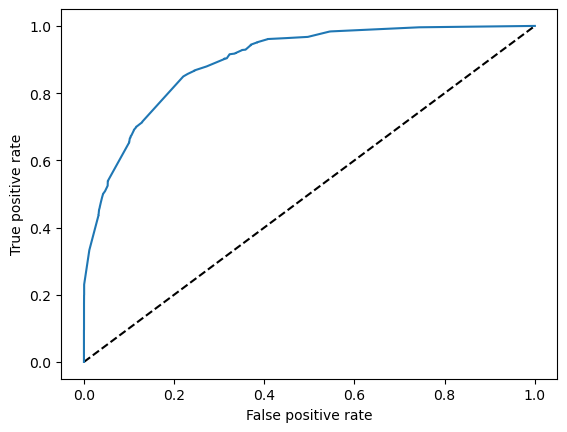

Auc Score:  
 0.7094688419676705


In [51]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve # this is only for binary 

y_pred_prob = Final_model.predict_proba(x_test)[:,1] # we choose one of the two classes
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) # false positive rate and true positive rate
roc_auc = auc(fpr, tpr) # 

plt.plot([0,1],[0,1],'k--') # k is about the line tipe 
plt.plot(fpr, tpr, label = 'Random Forest Classifier(area=%0.2f)'% roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score = roc_auc_score(y_test, Final_model.predict(x_test))
print('Auc Score: ','\n', auc_score)

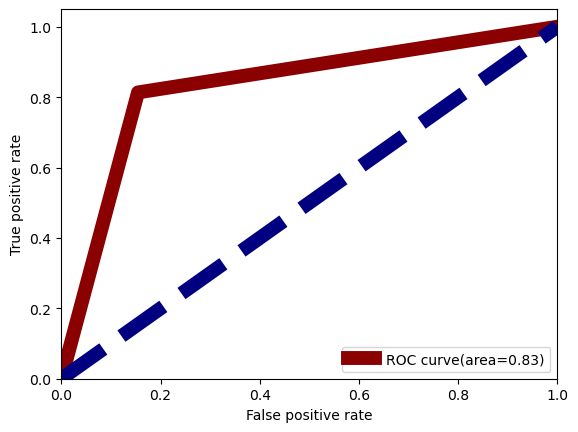

In [52]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkred', lw = 10, label = 'ROC curve(area=%0.2f)'% roc_auc) # the % 

plt.plot([0,1],[0,1], color ='navy', lw = 10, ls = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

In [53]:
import joblib
joblib.dump(Final_model, 'Census_income_analysis.pkl')

['Census_income_analysis.pkl']

In [55]:
# lets load the saved model and get the predictions
Final_model = joblib.load('Census_income_analysis.pkl')

# prediction
prediction = Final_model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
a = np.array(y_test) # this is to convert y_test intro array
df = pd.DataFrame({'Predicted':prediction,'Orignial':a})
df

,Predicted,Orignial
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
9044,0,0
9045,1,1
9046,0,1
9047,0,1


In [58]:
conclusion = pd.DataFrame([Final_model.predict(x_test)[:]], index = ['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,9039,9040,9041,9042,9043,9044,9045,9046,9047,9048
Predicted,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
Original,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
